In [1]:
from __future__ import division
%matplotlib inline
import CameraNetwork
import CameraNetwork.global_settings as gs
from CameraNetwork.utils import extractThumbnails
import cPickle
import cv2
import datetime
import Image
import ImageDraw
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import skimage.io as io
import time
import tqdm
from tqdm import tqdm_notebook
import traceback
plt.rcParams['figure.figsize'] = (8.0, 8.0)

c:\users\user\documents\code\cameranetwork_git\CameraNetwork\transformation_matrices.py:1899: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


In [2]:
c = CameraNetwork.CLIclient(timeout=60)
proxy_params = CameraNetwork.retrieve_proxy_parameters()
c.start(proxy_params)
time.sleep(3)
print c.client_instance.servers

['109', '109L', '110', '110L', '111', '111L', '112', '112L', '113L', '114L', '115', '115L', '116', '116L', '117', '117L', '118', '118L', '119', '119L', '120']


In [76]:
local_servers = [server_id for server_id in c.servers_list if server_id.endswith("L")]
print local_servers

['109L', '110L', '111L', '112L', '113L', '114L', '115L', '116L', '117L', '118L', '119L']


In [124]:
def fixImage(img, gamma=0.8):
    img = img[::-1, ...].astype(np.float)**gamma
    return (img/img.max()*255).astype(np.uint8)

In [111]:
images_ = {}
dfs_ = {}

In [127]:
images, dfs = {}, {}
DATE = "2017-03-14"
for server_id in tqdm.tqdm(local_servers[:-1]):
    reply = c[server_id].thumbnails(DATE, "5T", resolution=201, hdr_index=2, jpeg=100)
    images[server_id] = extractThumbnails(reply[1][0]["thumbnails"])
    dfs[server_id] = reply[1][0]["thumbs_df"]

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [09:05<00:00, 54.69s/it]


In [128]:
images_[DATE] = images
dfs_[DATE] = dfs
image_lengths = np.array([len(images[si]) for si in local_servers[:-1]])
print image_lengths.min()

152


In [129]:
video = cv2.VideoWriter(
    'MOSAIC_MOVE_{}.avi'.format(DATE),
    -1, 6, (804, 603)
)

for ind in tqdm_notebook(range(image_lengths.min())):
    try:
        full_image = np.zeros((603, 804, 3), dtype=np.uint8)
        for i, server_id in enumerate(local_servers[:-1]):
            m = i // 4
            n = i - m * 4
            full_image[201*m:201*(m+1), 201*n:201*(n+1), ...] = fixImage(images[server_id][ind], gamma=0.8)
        video.write(cv2.cvtColor(np.array(full_image), cv2.COLOR_RGB2BGR))
    except Exception, e:
        traceback.print_exc()
        
video.release()

## Debug

In [119]:
full_images = []
for img_index in range(126)
    full_image = np.zeros((603, 804, 3))
    for i, server_id in enumerate(local_servers[:-1]):
        m = i // 4
        n = i - m * 4
        full_image[201*m:201*(m+1), 201*n:201*(n+1), ...] = fixImage(images[server_id][50], gamma=0.8)
    full_images.append(full_image)

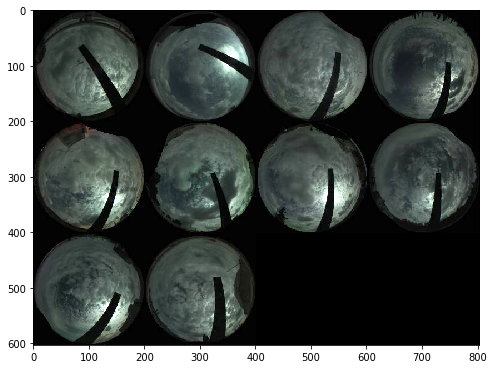

In [120]:
plt.imshow(full_image)